In [1]:
## Packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

In [2]:
## Load data
pd.options.display.max_columns = None

#pt_one = pd.read_csv("datasets/NBA_Player_Stats.csv")
#pt_two = pd.read_csv("datasets/NBA_Player_Stats_2.csv") Same dataset but with MVP column
#nba_df = pd.concat([pt_one, pt_two])
#nba_df = pd.read_csv("datasets/NBA_Player_Stats.csv")

player_df = pd.read_csv('datasets/all_seasons.csv', index_col='Unnamed: 0')
player_df = player_df.sort_values(by='season').reset_index(drop=True)

player_df.head(20)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Loren Meyer,PHX,24.0,208.28,117.933920,Iowa State,USA,1995,1,24,54,4.9,2.7,0.4,-6.7,0.085,0.140,0.215,0.489,0.046,1996-97
2,Tony Smith,CHH,29.0,193.04,92.986360,Marquette,USA,1990,2,51,69,5.0,1.4,2.2,0.7,0.035,0.051,0.156,0.477,0.175,1996-97
3,Litterial Green,DET,27.0,185.42,83.914520,Georgia,USA,1992,2,39,45,2.0,0.5,0.9,17.0,0.025,0.055,0.159,0.531,0.224,1996-97
4,Lionel Simmons,SAC,28.0,200.66,95.254320,La Salle,USA,1990,1,7,41,3.4,2.5,1.4,-10.5,0.065,0.173,0.162,0.442,0.179,1996-97
5,Lindsey Hunter,DET,26.0,187.96,88.450440,Jackson State,USA,1993,1,10,82,14.2,2.8,1.9,5.1,0.025,0.071,0.201,0.515,0.088,1996-97
6,Reggie Miller,IND,31.0,200.66,83.914520,UCLA,USA,1987,1,11,81,21.6,3.5,3.4,0.9,0.021,0.092,0.250,0.603,0.170,1996-97
7,Reggie Slater,TOR,26.0,200.66,97.522280,Wyoming,USA,Undrafted,Undrafted,Undrafted,26,7.8,3.7,0.8,1.5,0.108,0.163,0.228,0.558,0.092,1996-97
8,Reggie Williams,NJN,33.0,201.00,86.000000,Georgetown,USA,1987,1,4,13,5.8,2.4,0.8,-12.8,0.026,0.142,0.196,0.468,0.093,1996-97
9,Steve Kerr,CHI,31.0,190.50,81.646560,Arizona,USA,1988,2,50,82,8.1,1.6,2.1,10.1,0.018,0.062,0.130,0.667,0.140,1996-97


In [3]:
## Data Preprocessing for player dataframe
player_df.shape

# Clean field names below

## Replace whitespace in column names and remove erroneous characters
player_df.columns = player_df.columns.str.replace('[ ]', "_", regex = True)

## Make column names all lowercase
player_df.columns = player_df.columns.str.lower()

#Fix nulls
player_df.loc[player_df['college'].isnull(), 'college'] = 'None'

#Add season year
player_df['start_year'] = player_df['season'].apply(lambda x: int(str(x)[:4]))

## Review how many nulls in data
player_df.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)



Series([], dtype: int64)

In [4]:
#Remove players that didn't play
player_df.drop(player_df[player_df['gp'] < 1].index)
#player_df['start_year'] = player_df['start_year'].astype('object')

player_df.info()
player_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            12844 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,start_year
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,2009.609467
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,7.879836
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,2003.000000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,2010.000000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,2017.000000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,2022.000000


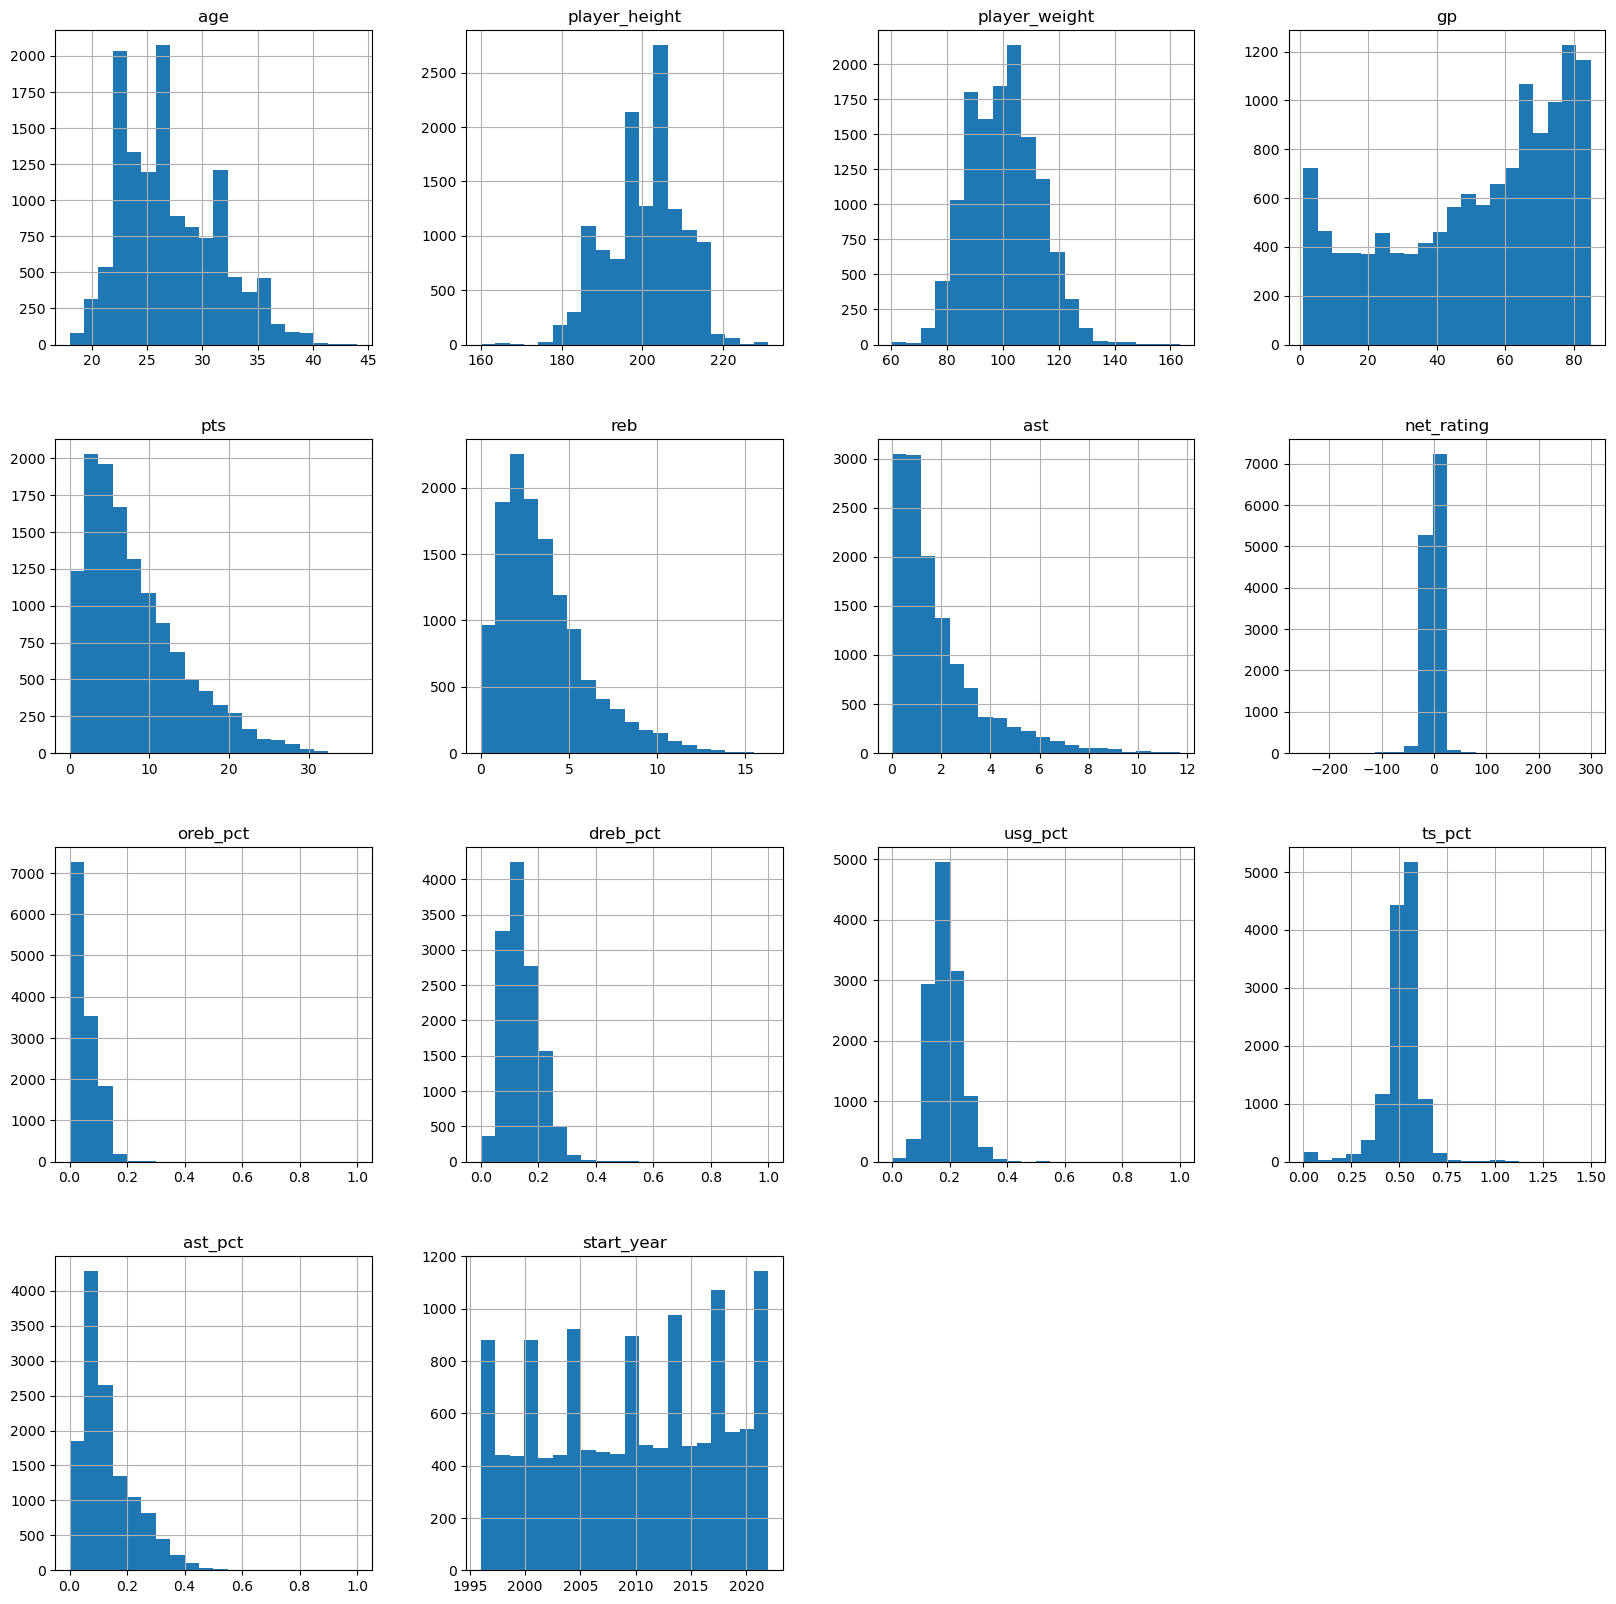

In [5]:
## View all numeric variables 
player_df.hist(figsize=(20,20),bins = 20)
#nba_df.hist(figsize=(20,20),bins = 20)
plt.show()

Based on what we see distributed, the following are metrics to look at:
- age
- gp (games played)
- game stats (pts, reb, oreb_pct, dreb_pct, ast)
- advanced stats (usg_pct, ts_pct, net_rating, ast_pct)
- measurements (height, weight)

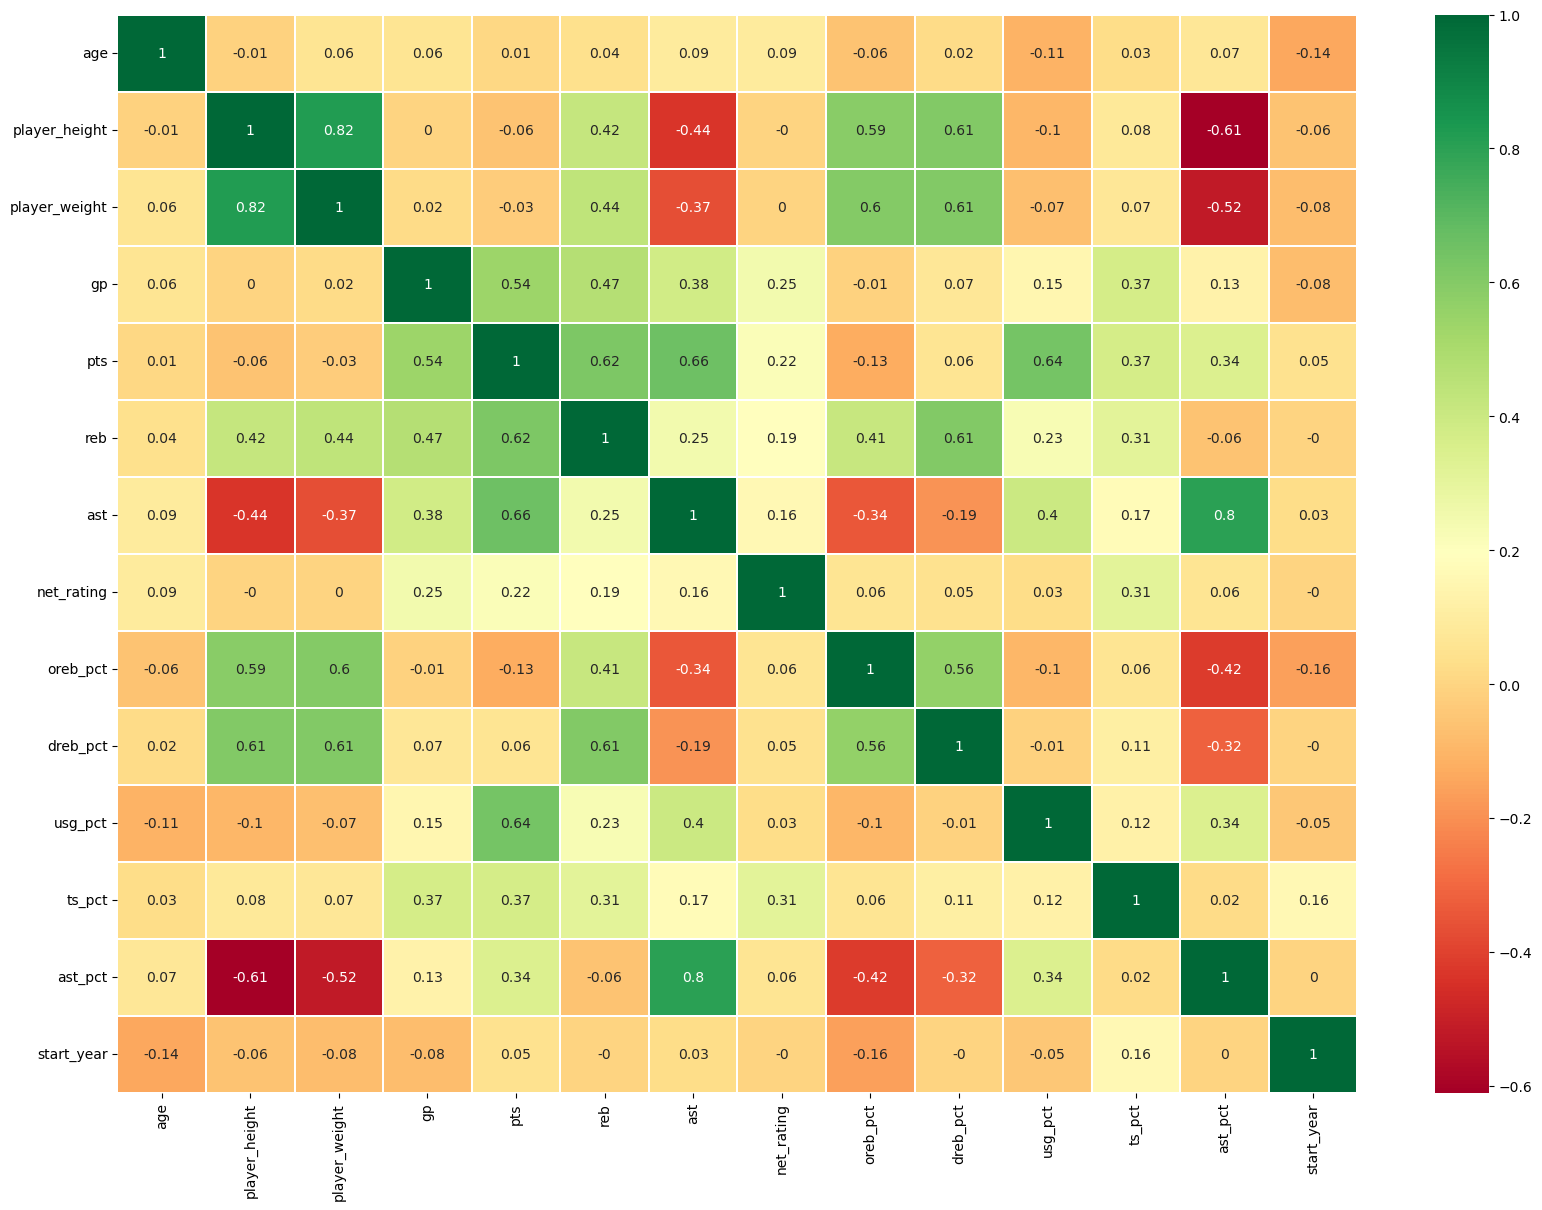

In [6]:
matrix_df = player_df.select_dtypes(include=['number'])

corr_matrix = matrix_df.corr().round(2)
f, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.1)
plt.show()

Looking at the correlations above:
- I see mostly correlations I expected but need to dive into stats in categorical view
    - View time series
    - View grouped by team
    - View grouped by draft
- Note: Something I want to explore would be with categorical values against the numeric
    - Possibly review team tenure and player performance. The idea is to see if there is relevance for being on certain teams against others.
    - Review tenure on first team versus after
        - Compare to what round they are drafted
    - Look at measurements against performance
    - Look at draft position to performance
    


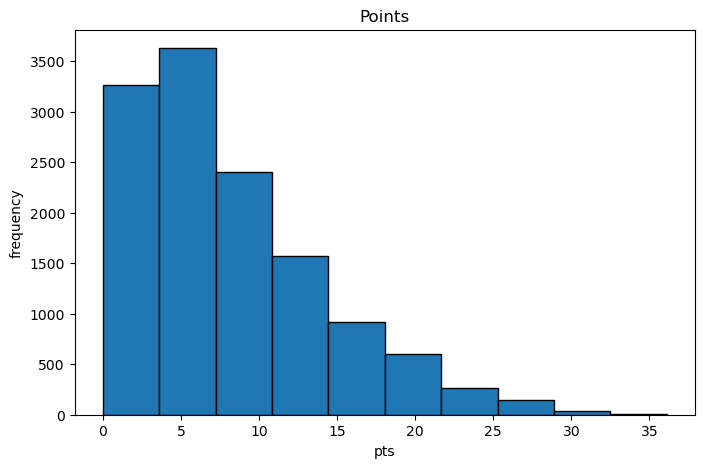

In [107]:
plt.figure(figsize=(8, 5))
plt.hist(player_df['pts'], bins=10, edgecolor='black')
plt.title('Points')
plt.xlabel('pts')
plt.ylabel('frequency')
plt.show()

In [8]:
player_df.head(2)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,start_year
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,1996
1,Loren Meyer,PHX,24.0,208.28,117.933920,Iowa State,USA,1995,1,24,54,4.9,2.7,0.4,-6.7,0.085,0.140,0.215,0.489,0.046,1996-97,1996


In [9]:
##Plot measurements

def plot_column(col):
    new_df = pd.DataFrame(player_df.groupby(['start_year'])[col].mean())
    new_df = new_df.rename({'player_name': f'Average {col}'}, axis=1)
    new_df.reset_index().head()
    plt.figure(figsize=(20,10))

    sns.lineplot(x='start_year', y=col, data=new_df)
    title = (' '.join(col.split('_'))).title()
    plt.title(f'Average {title}', fontsize=20)
    plt.show()

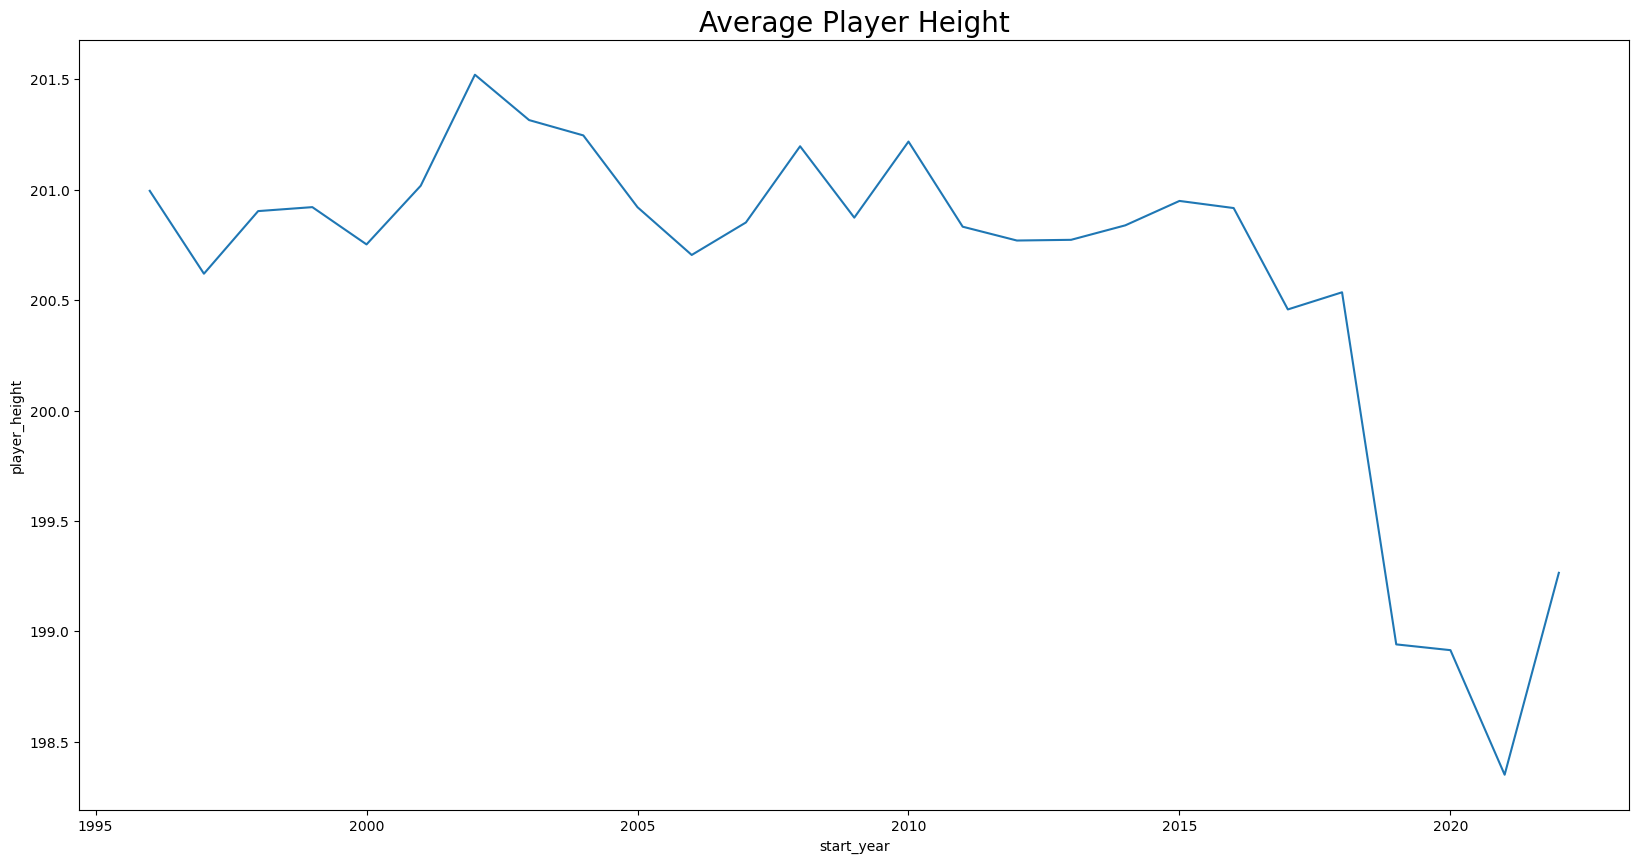

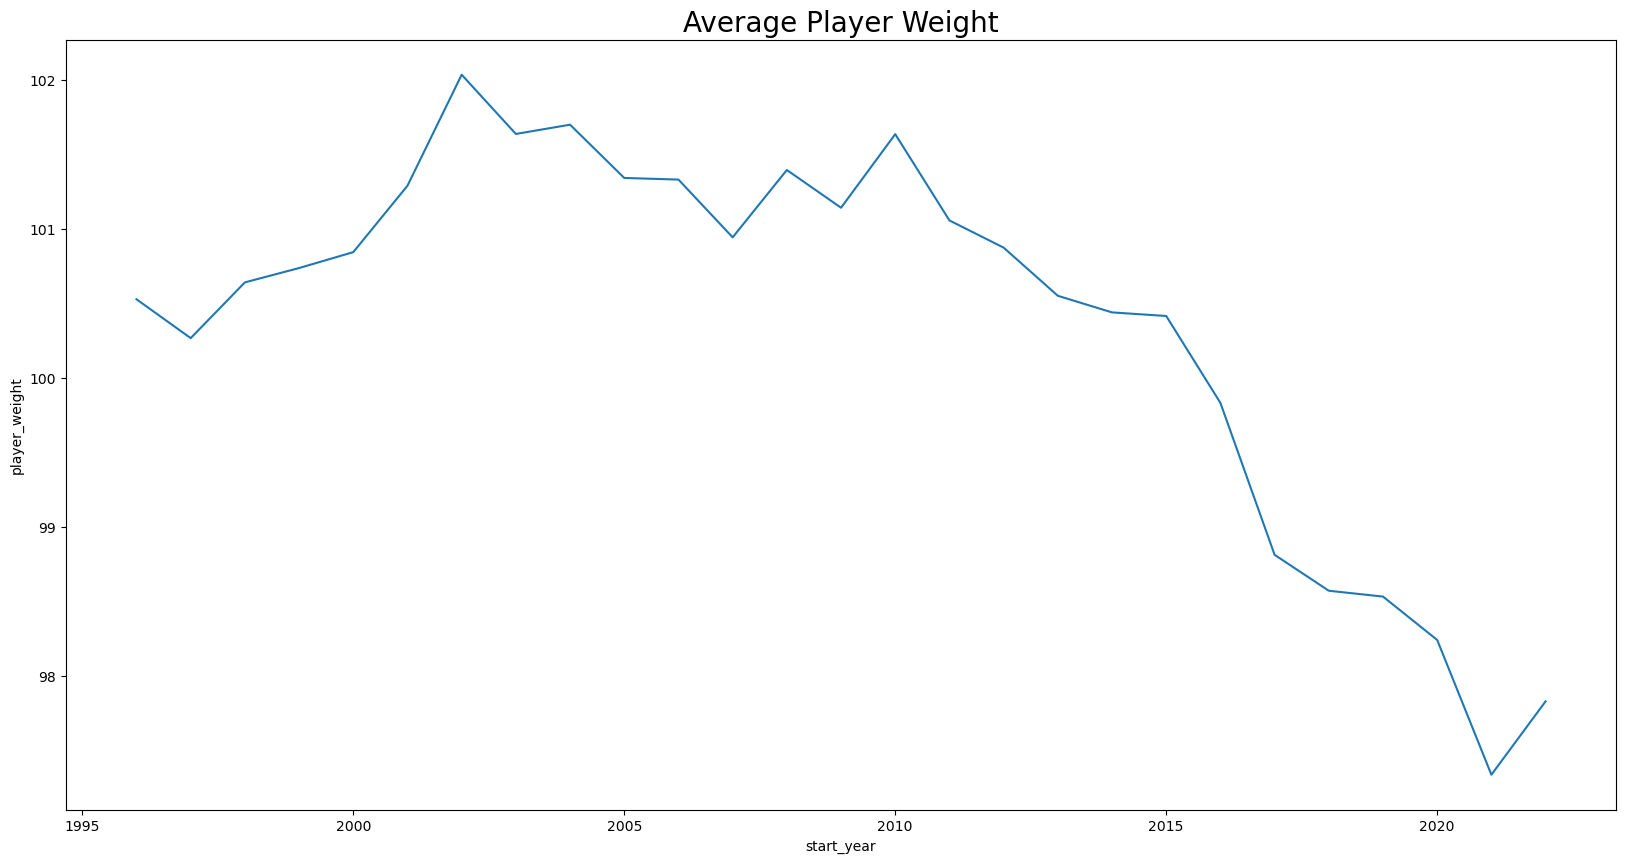

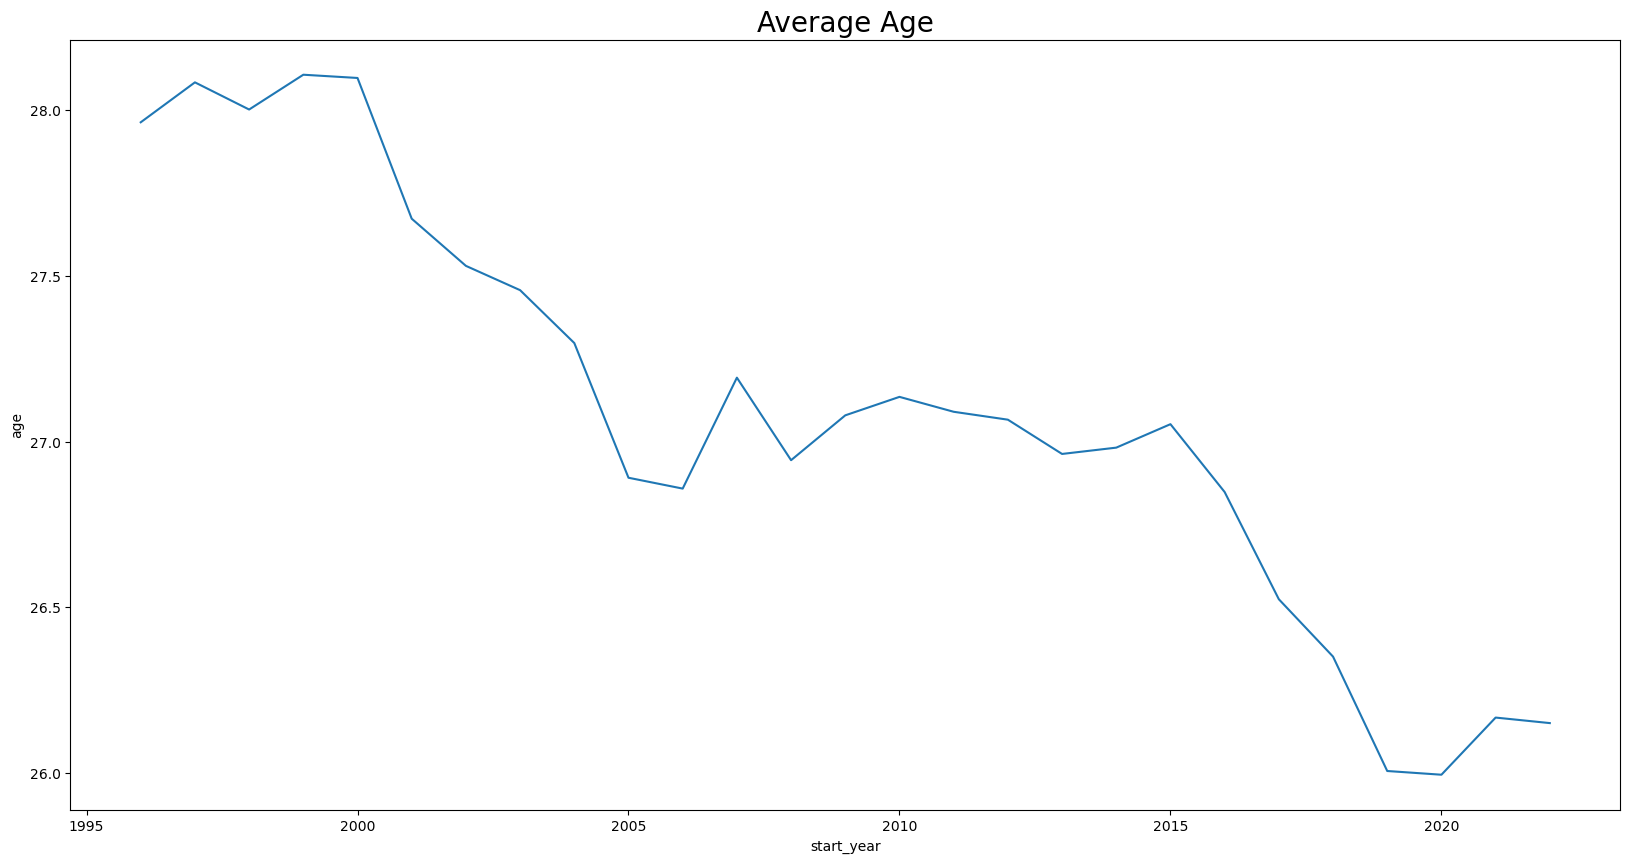

In [10]:
plot_column('player_height')
plot_column('player_weight')
plot_column('age')

The NBA has changed with teams now going with players currently shorter, smaller, and younger.
I want to isolate to those that are drafted. 

In [11]:
# Datasets to work with

#Rookie year
first_year = player_df[player_df['draft_year'] == player_df['season'].apply(lambda x: x[:4])] 

#Rank player to team across years
player_df['year_rank'] = player_df.groupby(['player_name', 'team_abbreviation'])['start_year'].rank() 

As mentioned above, these are things I'm interested in:
- Possibly review team tenure and player performance. The idea is to see if there is relevance for being on certain teams against others.
- Review tenure on first team versus after
- Compare to what round they are drafted
- Look at draft position to performance

How can I use categorical data to look at what I'm interested in?
- Lump teams and players
- Look at performance on first team against second team
- Look at drafted players and isolate to specific group that is valued
- Look at schools player came from


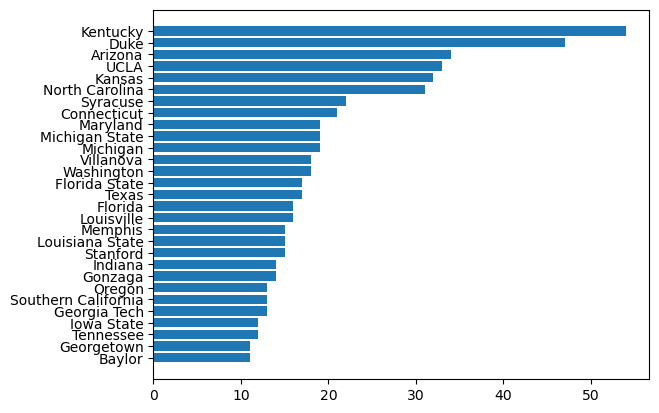

In [119]:
# Exclude undrafted players and see which college the drafted ones come from

#Only want to see top draft picks
dataset = first_year.loc[(first_year['draft_round'] == '1') & (first_year['college'] != 'None')]

dataset = first_year.groupby(['college'])['draft_round'].count()
dataset = dataset.reset_index()

#Exlcude noise
dataset = dataset.loc[(dataset['draft_round'] > 10) & (dataset['college'] != 'None')]

dataset = dataset.sort_values(by=['draft_round'])

# Create horizontal bars
plt.barh(y=dataset['college'], width=dataset['draft_round'])

# Display the plot
plt.show()

<BarContainer object of 36 artists>

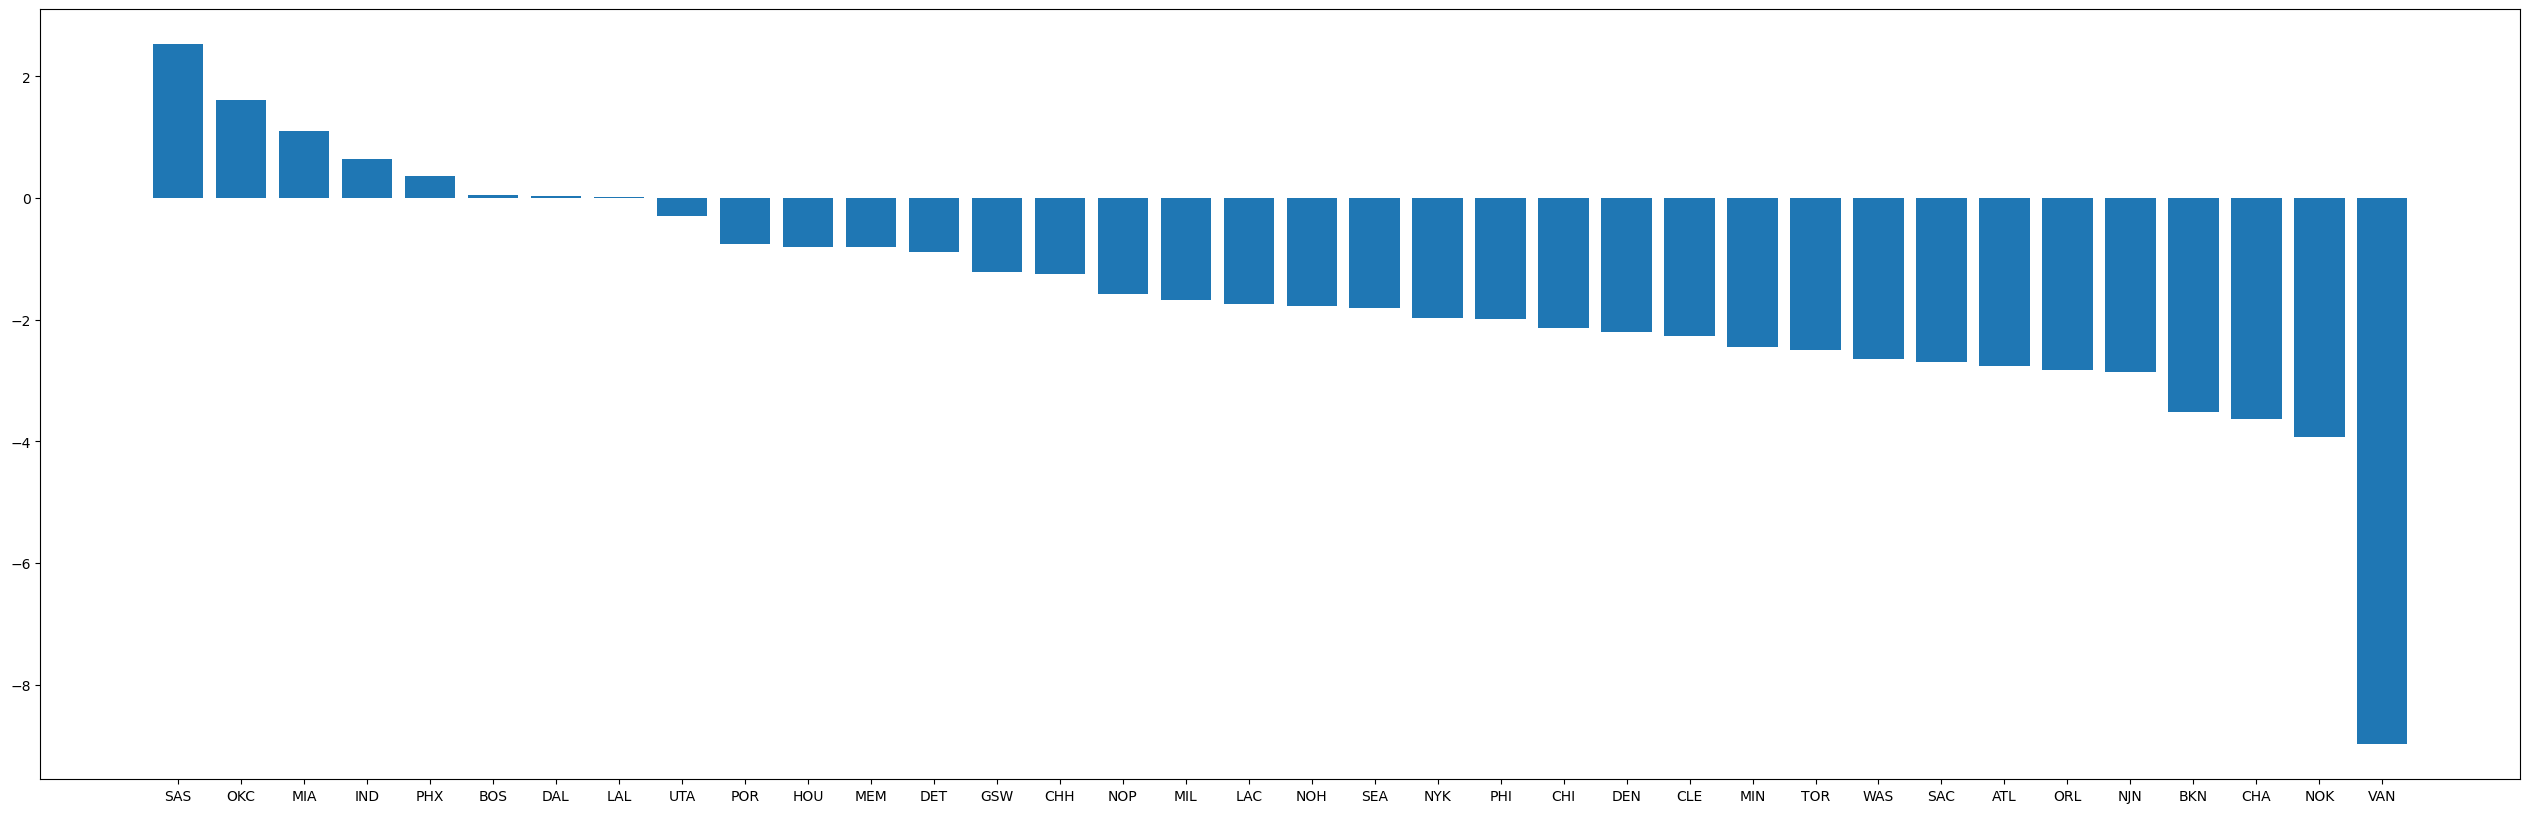

In [106]:
# Look at same population but performance in NBA
perf_df = player_df.loc[(player_df['draft_round'] == '1') & (player_df['college'] != 'None')]
perf_df = pd.DataFrame(perf_df.groupby(['team_abbreviation'])['net_rating'].mean())
perf_df = perf_df.reset_index()
perf_df = perf_df.sort_values(by=['net_rating'], ascending=False)


#plt.bar(perf_df['team_abbreviation'], perf_df['net_rating'], width=.8)
plt.figure(figsize=(32, 10))
display(plt.bar(perf_df['team_abbreviation'], perf_df['net_rating']))

Per source:
<a href="https://ballunlocked.com/what-is-net-rating-nba/">Net Rating Definition</a>
- Net Rating in NBA is a statistical measure that calculates the point differential a team scores per 100 possessions while on the court.
- Net Rating is an essential tool for evaluating team performance and player efficiency in the NBA, as it takes into account both offensive and defensive performance.
- Net Plus-Minus is a primary component of Net Rating and is calculated by comparing a team’s point differential with a specific player on and off the court.
- Net rating is a metric to measure player performance. A positive rating equates to We can see that teams with higher net rating usually 

Notes:
- The top teams historically have won a lot of games or are competitive. 
- Based on our population, first round picks have more success on the teams that are net zero or positive